https://www.statmethods.net/stats/rdiagnostics.html

In [3]:
install.packages("car")


also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘abind’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [4]:
# Assume that we are fitting a multiple linear regression
# on the MTCARS data
library(car)
fit <- lm(mpg~disp+hp+wt+drat, data=mtcars)

Loading required package: carData


## Outliers

No Studentized residuals with Bonferroni p < 0.05
Largest |rstudent|:
               rstudent unadjusted p-value Bonferroni p
Toyota Corolla  2.51597            0.01838      0.58816

Fiat 128 Toyota Corolla 
            18             20

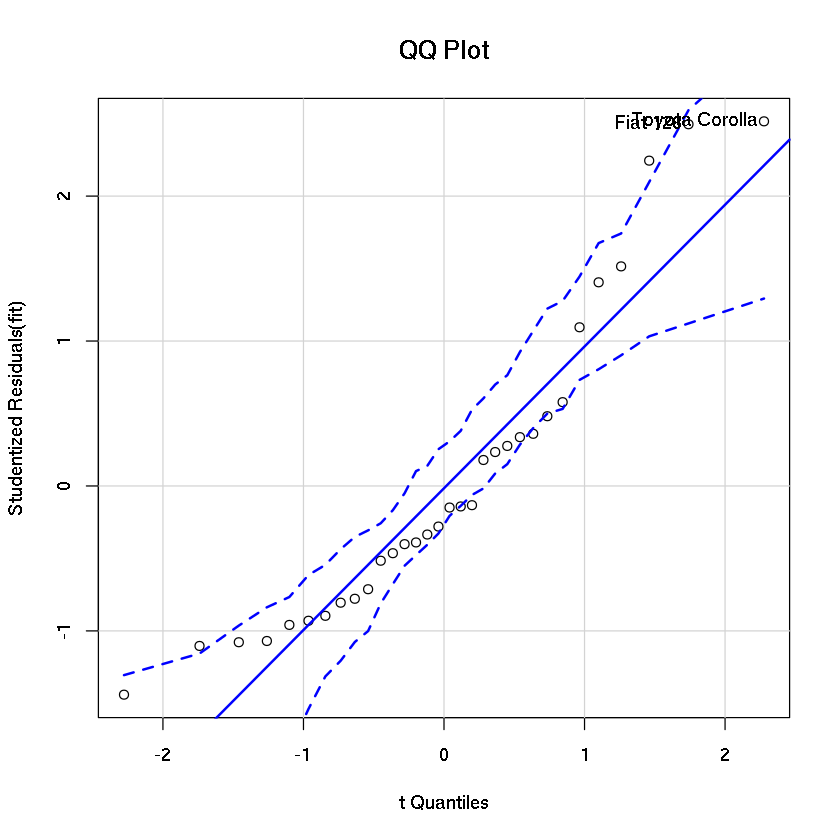

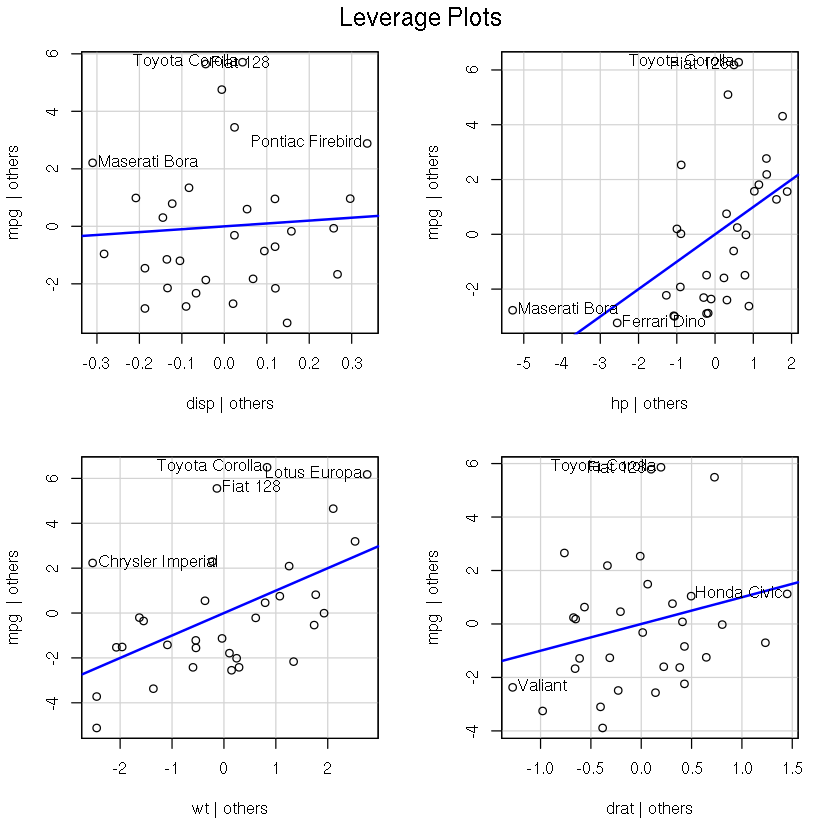

In [6]:
# Assessing Outliers
outlierTest(fit) # Bonferonni p-value for most extreme obs
qqPlot(fit, main="QQ Plot") #qq plot for studentized resid
leveragePlots(fit) # leverage plots

## Influential Observations

Warning message in plot.window(...):
“"id.method" is not a graphical parameter”Warning message in plot.xy(xy, type, ...):
“"id.method" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"id.method" is not a graphical parameter”Warning message in axis(side = side, at = at, labels = labels, ...):
“"id.method" is not a graphical parameter”Warning message in box(...):
“"id.method" is not a graphical parameter”Warning message in title(...):
“"id.method" is not a graphical parameter”Warning message in plot.xy(xy.coords(x, y), type = type, ...):
“"id.method" is not a graphical parameter”

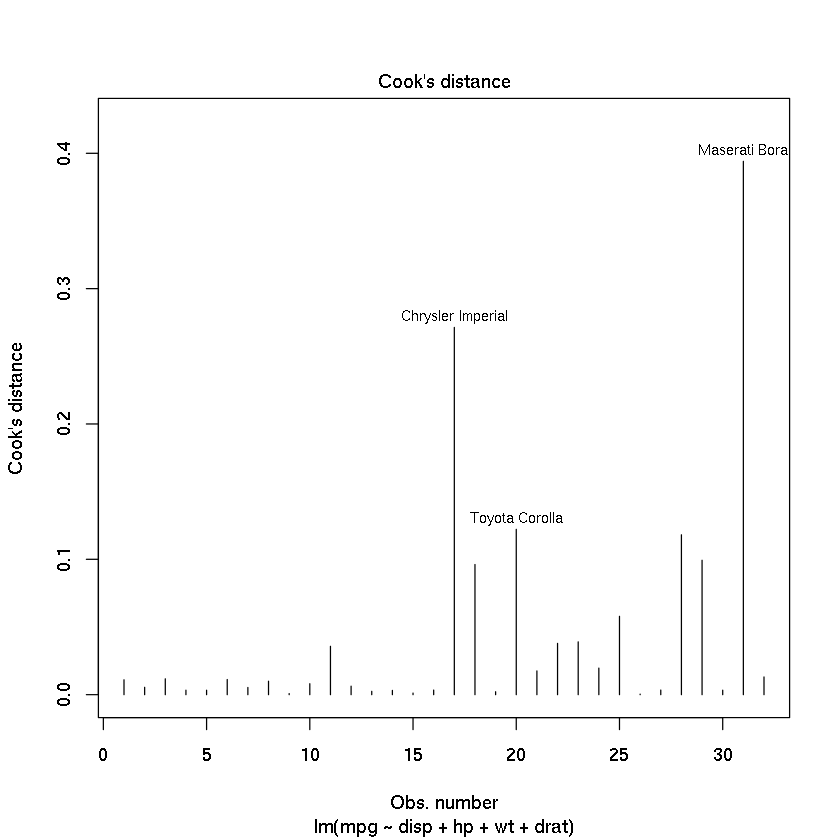

,StudRes,Hat,CookD
Chrysler Imperial,2.2446894,0.23636908,0.27133817
Fiat 128,2.4958292,0.08435766,0.09615527
Toyota Corolla,2.5159696,0.10355543,0.12213690
Ford Pantera L,-0.9300234,0.36351495,0.09929551
Maserati Bora,1.4051504,0.50833966,0.39406393


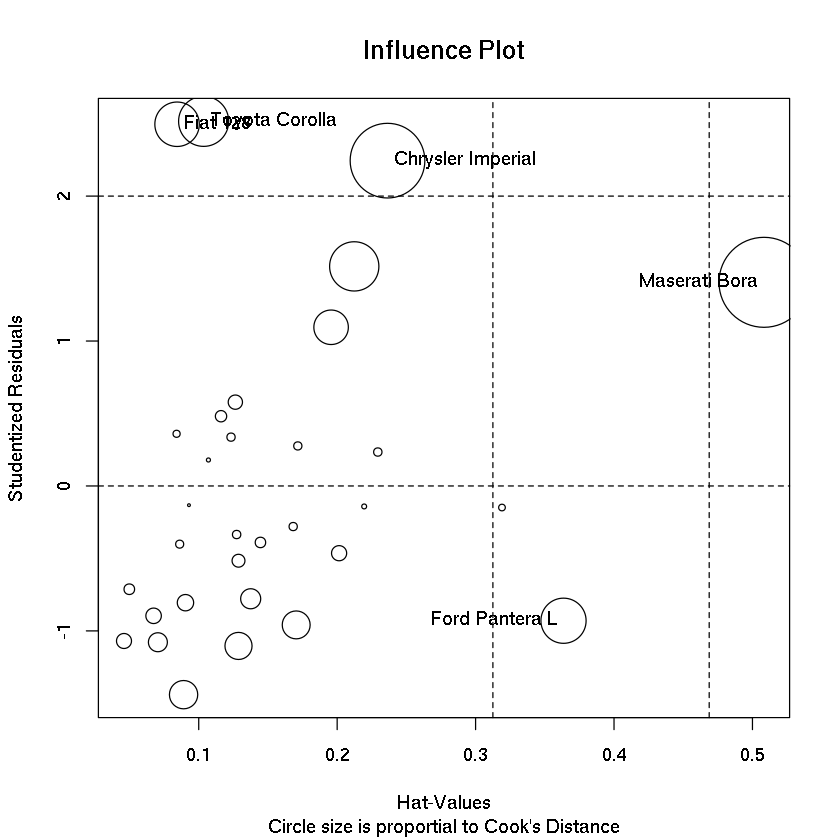

In [14]:
# Influential Observations
# added variable plots
# av.Plots(fit)
# Cook's D plot
# identify D values > 4/(n-k-1)
cutoff <- 4/((nrow(mtcars)-length(fit$coefficients)-2))
plot(fit, which=4, cook.levels=cutoff)
# Influence Plot
influencePlot(fit, id.method="identify", main="Influence Plot", sub="Circle size is proportial to Cook's Distance" )

Non-normality


Fiat 128 Toyota Corolla 
            18             20

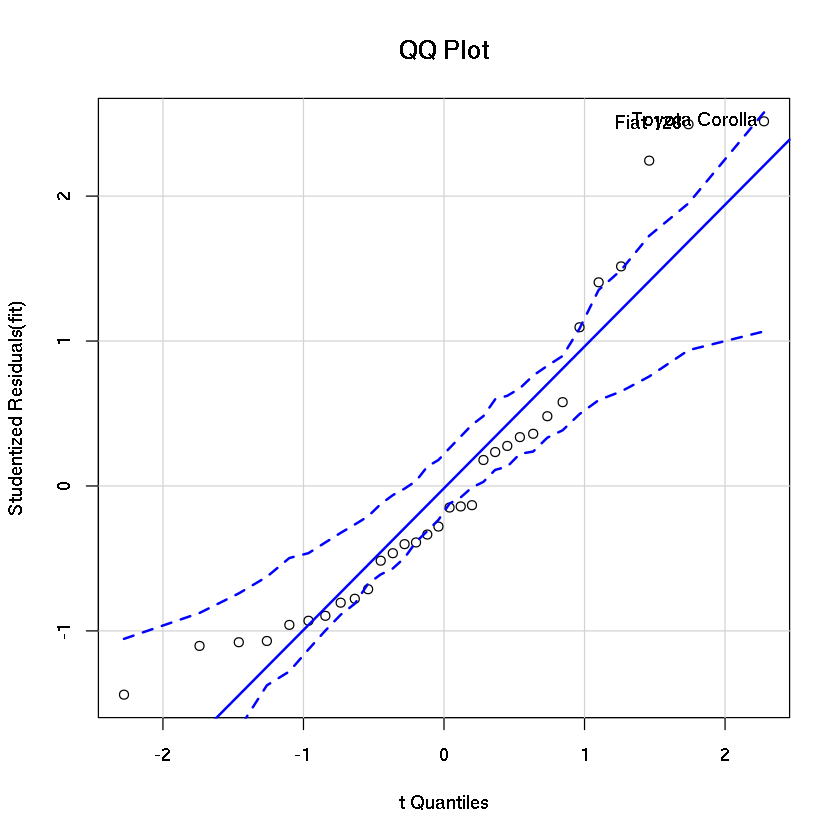

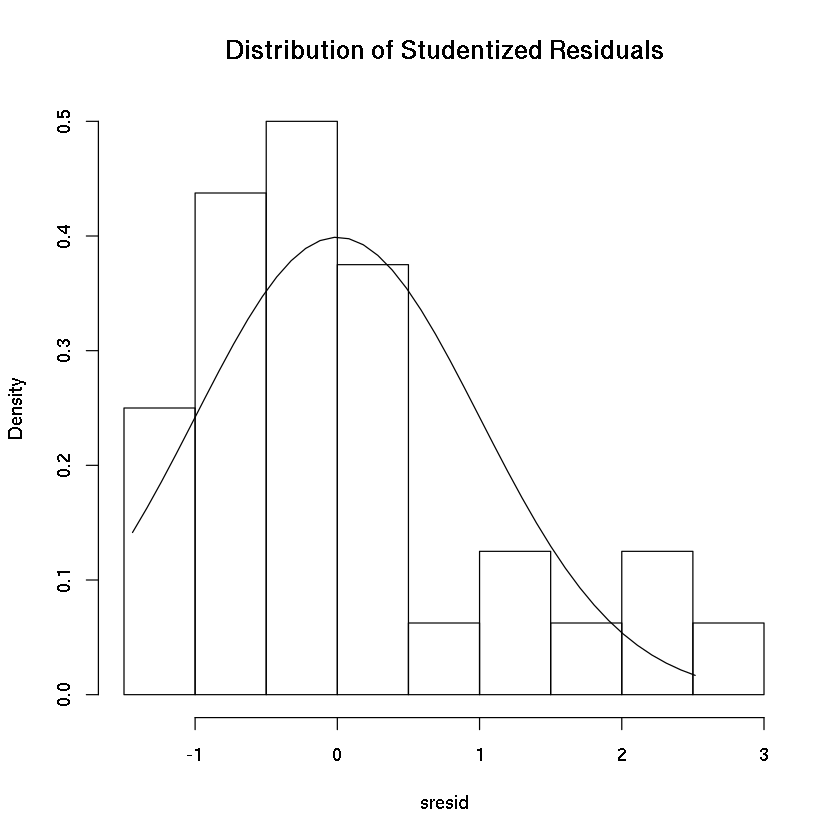

In [15]:
# Normality of Residuals
# qq plot for studentized resid
qqPlot(fit, main="QQ Plot")
# distribution of studentized residuals
library(MASS)
sresid <- studres(fit)
hist(sresid, freq=FALSE,
   main="Distribution of Studentized Residuals")
xfit<-seq(min(sresid),max(sresid),length=40)
yfit<-dnorm(xfit)
lines(xfit, yfit)

Non-constant Error Variance

Non-constant Variance Score Test 
Variance formula: ~ fitted.values 
Chisquare = 1.429672, Df = 1, p = 0.23182


Suggested power transformation:  0.6616338 

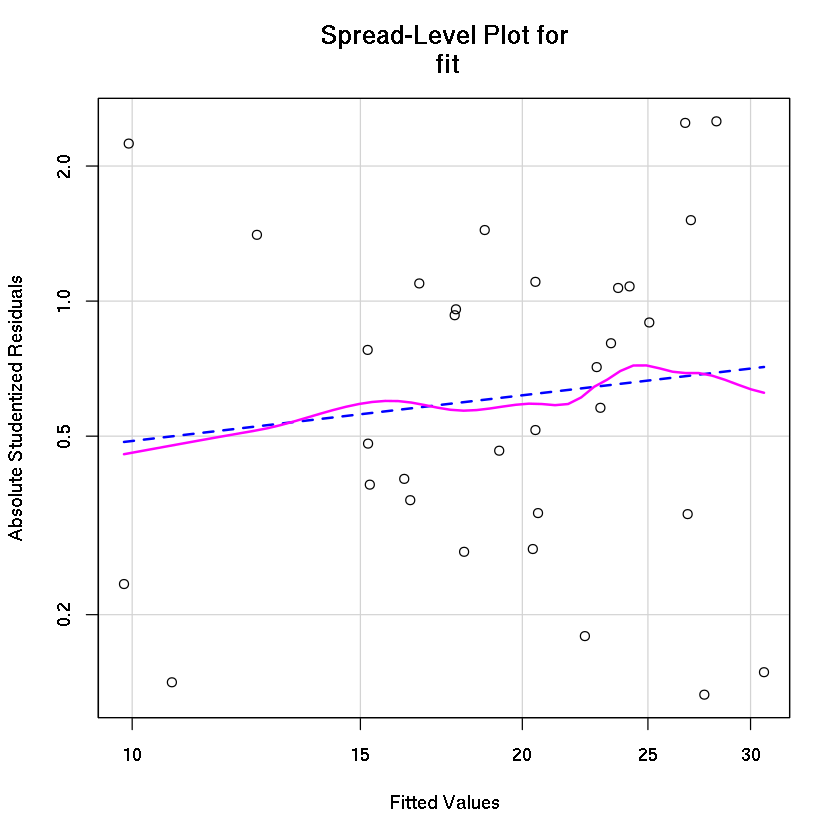

In [16]:
# Evaluate homoscedasticity
# non-constant error variance test
ncvTest(fit)
# plot studentized residuals vs. fitted values
spreadLevelPlot(fit)

In [17]:
# Evaluate Collinearity
vif(fit) # variance inflation factors
sqrt(vif(fit)) > 2 # problem?

disp       hp       wt     drat 
8.209402 2.894373 5.096601 2.279547

disp    hp    wt  drat 
 TRUE FALSE  TRUE FALSE

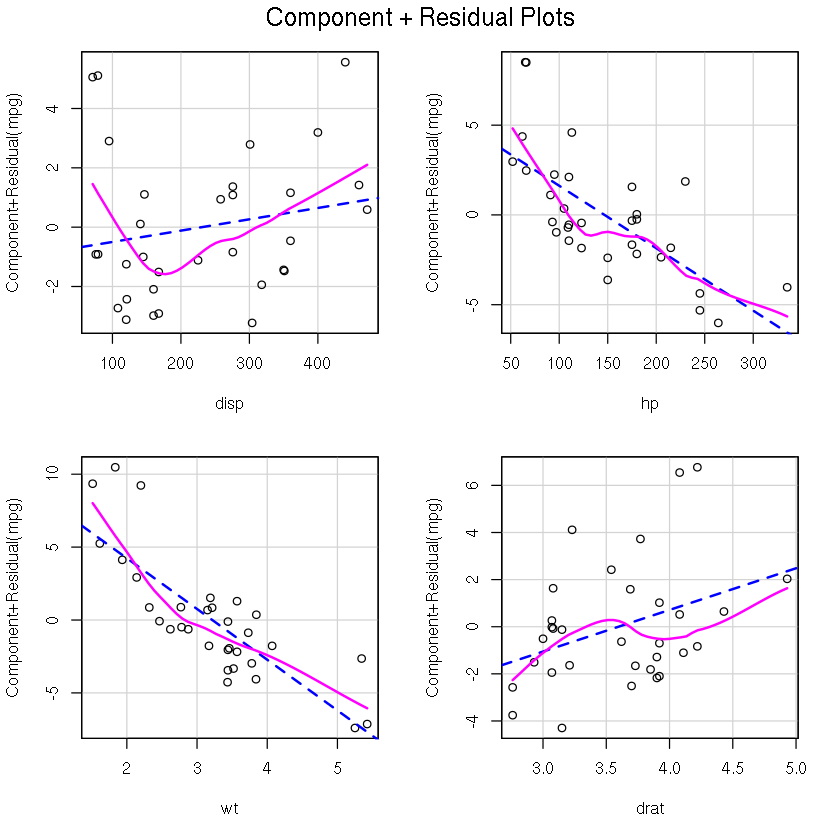

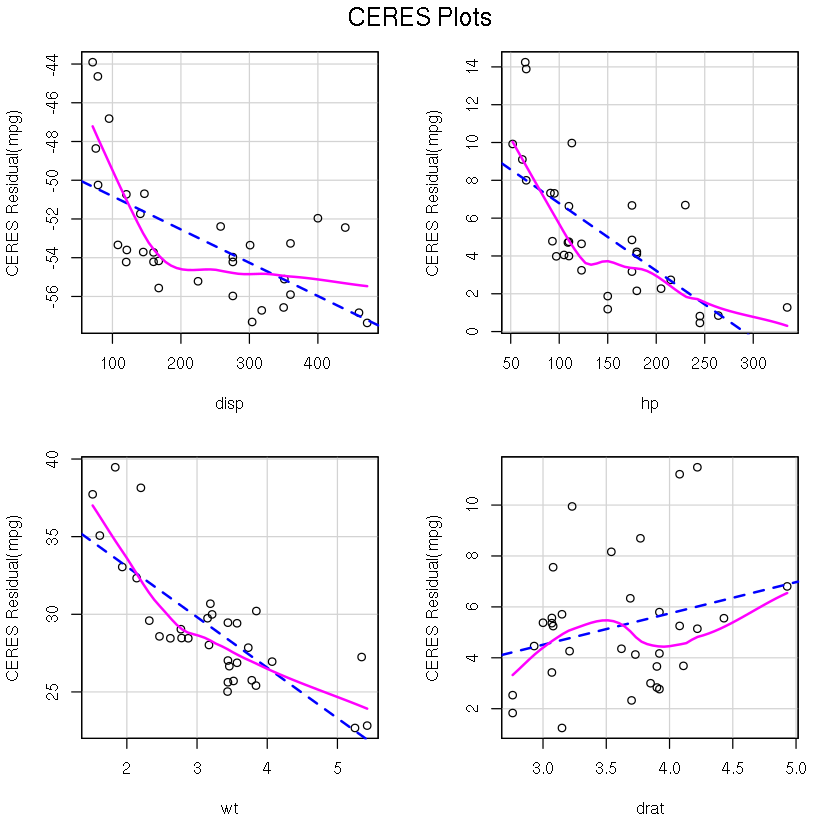

In [18]:
# Nonlinearity
# Evaluate Nonlinearity
# component + residual plot
crPlots(fit)
# Ceres plots
ceresPlots(fit)

In [19]:
# Non-independence of Errors
# Test for Autocorrelated Errors
durbinWatsonTest(fit)

 lag Autocorrelation D-W Statistic p-value
   1        0.100862      1.735915   0.284
 Alternative hypothesis: rho != 0

In [22]:
install.packages("gvlma")


Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [23]:
# Global test of model assumptions
library(gvlma)
gvmodel <- gvlma(fit)
summary(gvmodel)


Call:
lm(formula = mpg ~ disp + hp + wt + drat, data = mtcars)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.5077 -1.9052 -0.5057  0.9821  5.6883 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 29.148738   6.293588   4.631  8.2e-05 ***
disp         0.003815   0.010805   0.353  0.72675    
hp          -0.034784   0.011597  -2.999  0.00576 ** 
wt          -3.479668   1.078371  -3.227  0.00327 ** 
drat         1.768049   1.319779   1.340  0.19153    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.602 on 27 degrees of freedom
Multiple R-squared:  0.8376,	Adjusted R-squared:  0.8136 
F-statistic: 34.82 on 4 and 27 DF,  p-value: 2.704e-10


ASSESSMENT OF THE LINEAR MODEL ASSUMPTIONS
USING THE GLOBAL TEST ON 4 DEGREES-OF-FREEDOM:
Level of Significance =  0.05 

Call:
 gvlma(x = fit) 

                      Value  p-value                   Decision
Global Stat        13.93816 0.007495 Assumptions NOT s